# SAS Windowing Environment

Okay, so you want to write and run a SAS program in the SAS System. How do you go about doing that? The first thing you need to do is to open your SAS software. In this section, we will explore what you will see when you open your SAS software (in whichever method you chose). In particular, we will learn about

* The explorer window
* The editor window
* The log window
* The output window
* The results window

## SAS Window Panes


If you purchased SAS or are using UFApps, then your SAS version will look like this:

![SAS Windows Environment in SAS 9.4 for Windows or UFApps](./img/SAS_interface.gif)

Or if you are using SAS University Edition or SAS OnDemand for Academics, then it will look something like this:

![SAS University Edition and SAS OnDemand for Academics windowing environment.](./img/SAS_interface_Uni_OnDemand.png)

See if you can identify on your screen the following five windows: the Editor Window, the Log Window, the Output Window, the Explorer Window, and the Results Window. You may have to click on the appropriate tabs along the bottom in order to activate each of the five windows. Note that a window is activated when its top blue bar appears brighter, and the window is deactivated when its top blue bar appears dimmer.

**Editor Window**. The Editor Window is where you type in your SAS programs. It allows you to perform standard editing tasks, such as entering, editing and submitting programs. In the Editor window, you can also open previously saved SAS programs, as well as save new SAS programs. After you have typed in your SAS program, and are satisfied that it meets all of the syntax requirements discussed above, you can "run" (or "execute") your program by clicking on the "running man" icon. 

For Windows operating systems, the default editor is called the Enhanced Editor, because it gives you a nudge — through the use of differently colored text — if your program contains a syntax error. The Enhanced Editor also allows you to collapse and expand the various steps in your program.

**Log Window**. The Log Window displays messages about your SAS session and any programs that you submit. You should always plan on checking this window after running a program. Even though your program may appear to have run correctly, critical errors may still have occurred when reading or manipulating the data. SAS uses the following color-coded system to assist you in reading the log:

* the DATA and PROC steps that appear in your program are printed in **black**
* notes that SAS wants to report to you are printed in **blue**
* warnings that SAS wants to draw to your attention are printed in **green**
* and errors that cause SAS to abort running your program are printed in **red**

**Output/Results Window**. The Output Window is where the printable results from your program appear. It is positioned behind the Log and Editor Windows until there is output to display, when it automatically opens or moves to the front of your display. Examples of output that your programs might create include data listings, table summaries, charts, and character-based plots and graphs. If you review the Output Window after running a program and some output that you expected is missing, then double-check the Log Window to see if you had any programming errors that prevented SAS from executing your commands. Note, though, that not all SAS programs create output in the Output Window. If you create HTML output, for example, it can be viewed in the internal SAS browser called the Results Viewer Window. And, if you create a graph, it will appear in a separate Graph Window.

Note that if your program is creating output in the Results Viewer Window, by default, you will want to turn this feature off. Currently SAS 9.1 and 9.2 default to the Output Window, while SAS 9.3 and 9.4 default to the Results Viewer Window. Make this change under preferences (found in the tools menu, under options). Note that SAS University Edition and SAS OnDemand for Academics only has a results window.

**Explorer Window**. The Explorer Window allows you to easily view and manage your SAS files, which are stored in SAS data libraries. We'll learn more about data libraries later. For now, it suffices to know that a library name is just a nickname for the actual location — that is, a folder on your computer — of your SAS files. The Explorer Window can be used to create new SAS libraries and files, to open SAS files, and to move, copy and delete SAS files.

**Results Window**. (Note that the Results Window is not the same as the Results Viewer Window described previously.) The Results Window serves much like a table of contents for your Output Window. That is, it itemizes each section of your Output Window in outline form so you can easily jump from one piece of output to another. The Results Window is empty until you submit a SAS program that creates output. Then, it moves to the front of your display. 
    
Note that in SAS University Edition and SAS OnDemand for Academics, this table of contents is moved to under the Results tab with the output and is called Table of Contents.

## A Sample SAS Program

Using the Charm City Circulator Ridership dataset, try submitting the following SAS code and explore what shows up in the different windows. You will need to update the line setting the path to your working directory where you have saved the Char City dataset. Do not worry about understanding exactly what the code is doing at this point. We will explore this as we go through the course materials.

SAS Connection established. Subprocess id is 5689




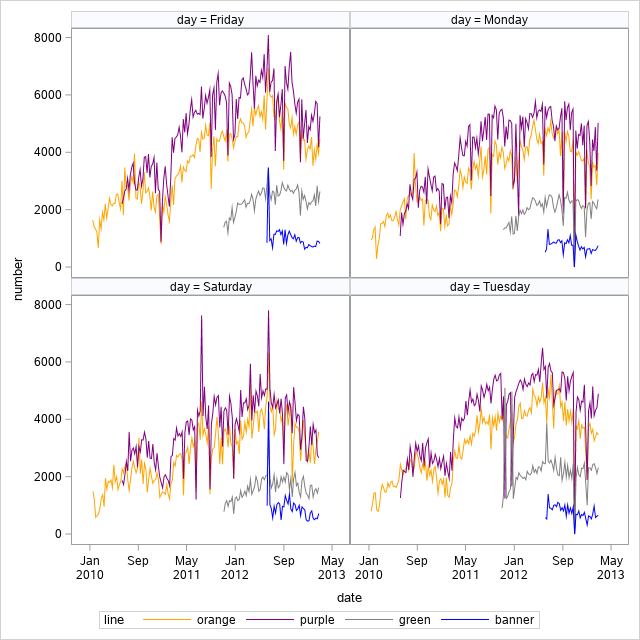

In [1]:
%let working_directory = data; *Replace data with your path to your 
                                directory containing the dataset;

proc import datafile = "&working_directory/Charm_City_Circulator_Ridership.csv" 
    out = circ dbms = csv replace;
    getnames = yes;
    guessingrows = max;
run;

proc sort data = circ;
  by day date daily;
run;

proc transpose data = circ out = long (rename=(_NAME_ = var col1 = number));
  var orangeboardings -- banneraverage;
  by day date daily;
run;

data long2;
  set long;
  var = tranwrd(var, 'Board', '_Board');
  var = tranwrd(var, 'Alight', '_Alight');
  var = tranwrd(var, 'Average', '_Average');
  line = scan(var, 1, '_');
  type = scan(var, 2, '_');
  drop var;
run;

data avg;
  set long2;
  where (type = "Average");
run;

data palette;
  input id $ value $ linecolor $;
  markercolor = linecolor;
  datalines;
lc banner blue
lc green darkgreen
lc orange orange
lc purple purple
;
run;

proc sgpanel data = avg dattrmap=palette; 
  where day in ("Monday" "Tuesday" "Friday" "Saturday");
  panelby day;
  series Y = number X = date / group = line attrid = lc;
run;


* Run the program by clicking on the "running man" icon
* After the program has run, note that as promised the Output/Results Window moves to the front of the other open SAS windows.
* Click on the Log Window tab on the bottom of your screen so that the window becomes accessible to you. Review the contents of the window to see the messages that SAS displays. You might want to maximize the window to do so.
* After you've reviewed the Log Window, you can clear it if you'd like by selecting the Edit menu along the top of your screen, and then selecting Clear All. In general, when you select Clear All, SAS will clear all of the contents of whichever window is currently active.
* Now, click on the Editor Window tab on the bottom of your screen so that the window becomes accessible to you again. Use your mouse to click on the minus sign that appears just before the PROC SGPANEL statement. Then, click on the plus sign. In general, clicking on a minus sign collapses the relevant program module, while clicking on a plus sign expands it.
* Now, use your mouse to select the three lines of code that begins with PROC SGPANEL and ends with RUN. If you click on the "running man" icon now, SAS will run only the selected code. This can be very helpful to you when you are trying to write and debug just a portion of your program.
* Now, to save the SAS program, select the File menu along the top of your screen, and then select Save as .... Proceed to save the file in a convenient location just as you would any other windows file. (Note that SAS saves a SAS program with a ".sas" extension.) You can open the SAS program again by selecting the File menu and then Open Program ...

That should be enough to get you started in using the SAS windowing environment. You will be writing a number of programs throughout the semester, and you'll no doubt get even more familiar with it. For that reason, however, you will want to make yourself a course folder now in which you can save your SAS programs and data sets.

## Exercise

Use the sample SAS program code provided above and the Charm City Circulator Ridership dataset to experiment with using SAS by making the following changes to the provided code.

1. Go through and change the colors using the attribute map dataset `palette` to something other than what they originally were. See https://support.sas.com/content/dam/SAS/support/en/books/pro-template-made-easy-a-guide-for-sas-users/62007_Appendix.pdf for a large list of colors in SAS.
2. Change the days you are keeping to show `"Sunday"` instead of "`Saturday"`.
3. Change the plot from a line plot to a scatterplot by changing `series` to `scatter` in `proc sgpanel`.